### Importing Basic libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading training data and reading top 5 records

df = pd.read_csv('train_LZdllcl.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
### Reading bottom 5 records

df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [4]:
print("There are {} rows and {} columns in the training dataset.".format(df.shape[0],df.shape[1]))

There are 54808 rows and 14 columns in the training dataset.


### Exploratory Data Analysis:

In [5]:
# To know the datatypes of the column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
print("There are {} duplicate records.".format(df.shape[0] - len(df['employee_id'].unique())))

There are 0 duplicate records.


In [7]:
# Droping employee_id column as it doesnot provide any information

df.drop('employee_id',axis=1,inplace=True)

In [8]:
# Name of the columns

print("Column Names: {}".format(list(df.columns)))

Column Names: ['department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']


In [9]:
# Column names into list

col_name = df.columns.to_list()

In [10]:
# To find out number of unique values and unique vales of a perticular column

for i in col_name:
    print("In the column - {}:".format(i))
    print("There are {0} Unique values".format(len(df[i].unique())))
    print("Unique vales in the column are - \n{}".format(list(df[i].unique())))
    print("")

In the column - department:
There are 9 Unique values
Unique vales in the column are - 
['Sales & Marketing', 'Operations', 'Technology', 'Analytics', 'R&D', 'Procurement', 'Finance', 'HR', 'Legal']

In the column - region:
There are 34 Unique values
Unique vales in the column are - 
['region_7', 'region_22', 'region_19', 'region_23', 'region_26', 'region_2', 'region_20', 'region_34', 'region_1', 'region_4', 'region_29', 'region_31', 'region_15', 'region_14', 'region_11', 'region_5', 'region_28', 'region_17', 'region_13', 'region_16', 'region_25', 'region_10', 'region_27', 'region_30', 'region_12', 'region_21', 'region_8', 'region_32', 'region_6', 'region_33', 'region_24', 'region_3', 'region_9', 'region_18']

In the column - education:
There are 4 Unique values
Unique vales in the column are - 
["Master's & above", "Bachelor's", nan, 'Below Secondary']

In the column - gender:
There are 2 Unique values
Unique vales in the column are - 
['f', 'm']

In the column - recruitment_channel:


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


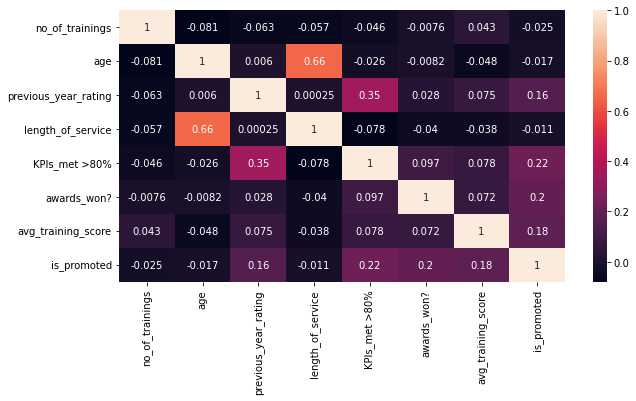

In [12]:
# Correlation Matrix

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

- 'length_of_service' is highly correlated with 'age'
- 'KPIs_met >80%' is slightly correlated with 'previous_year_rating'

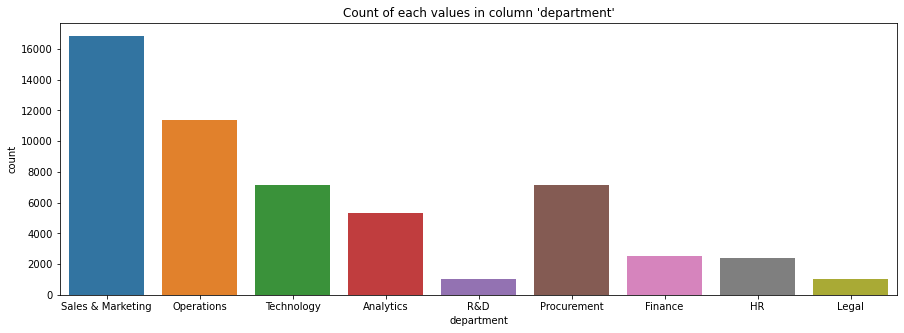

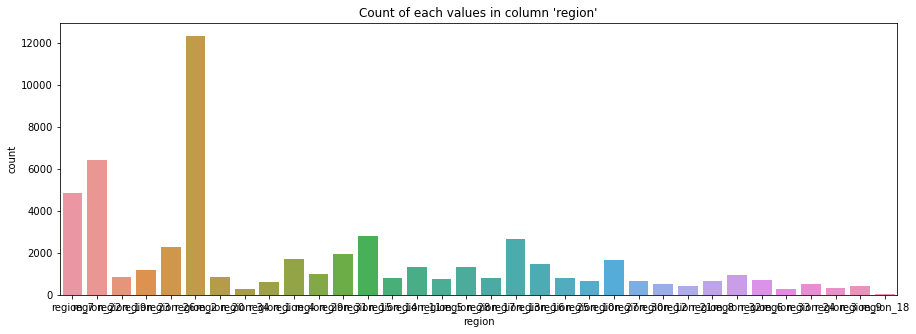

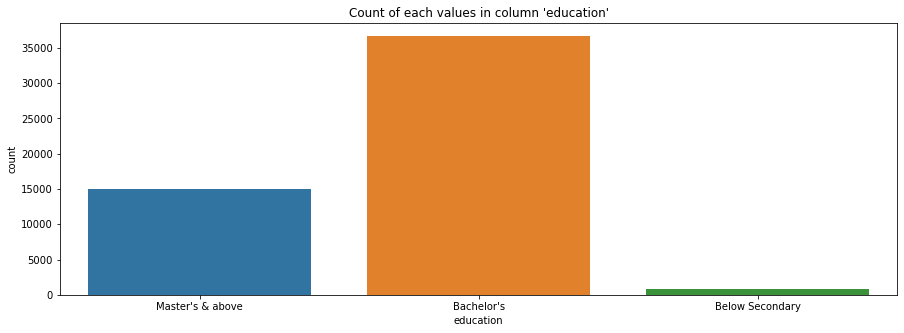

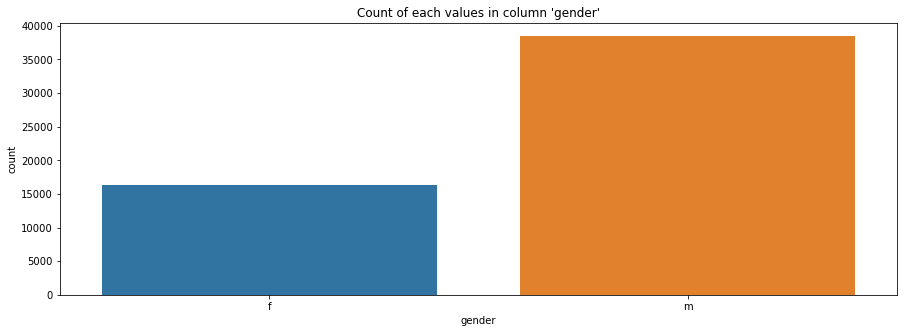

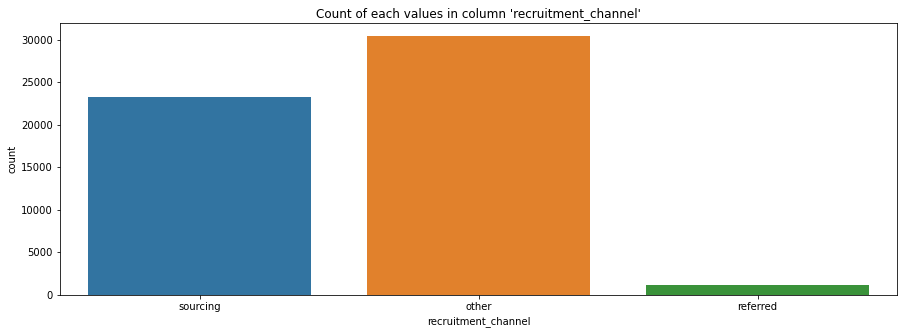

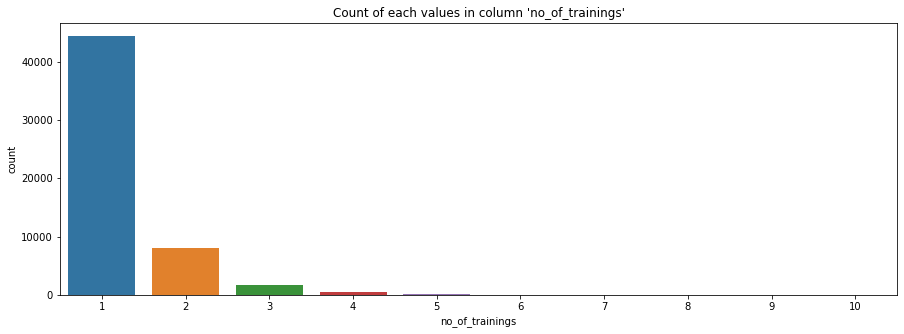

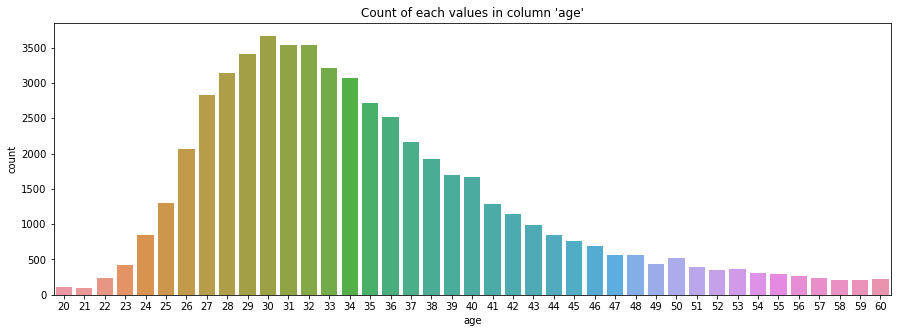

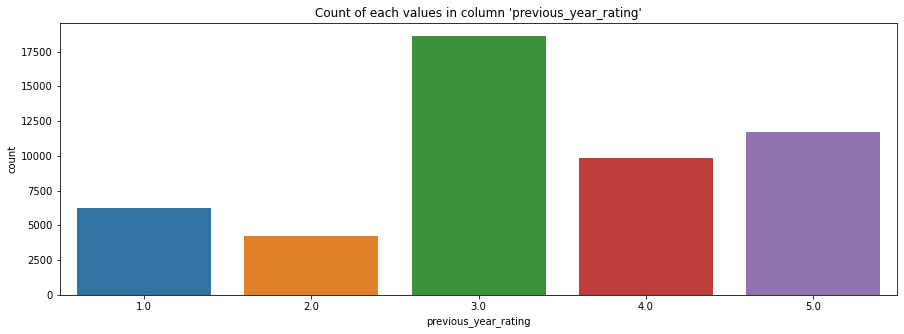

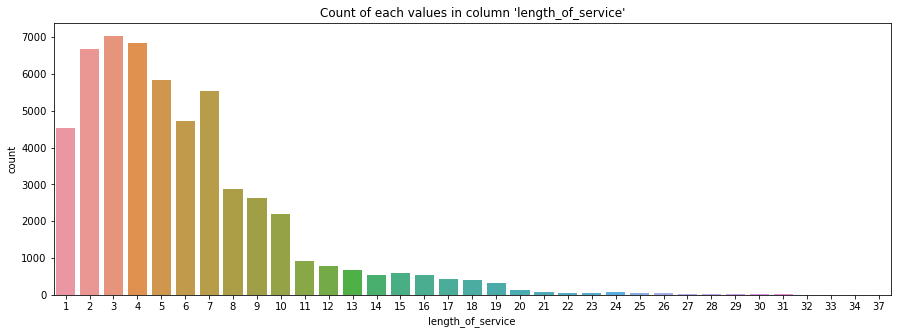

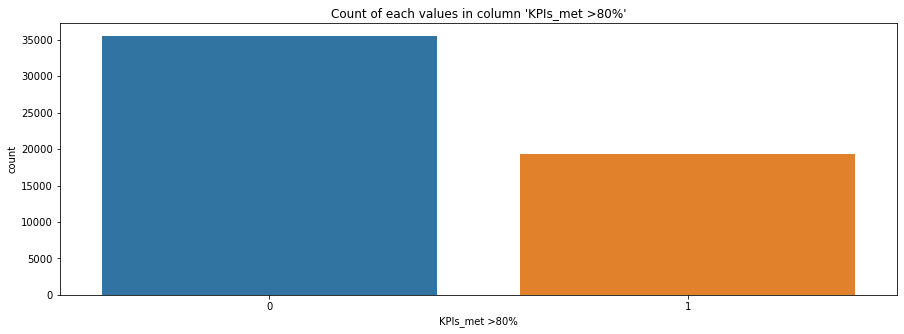

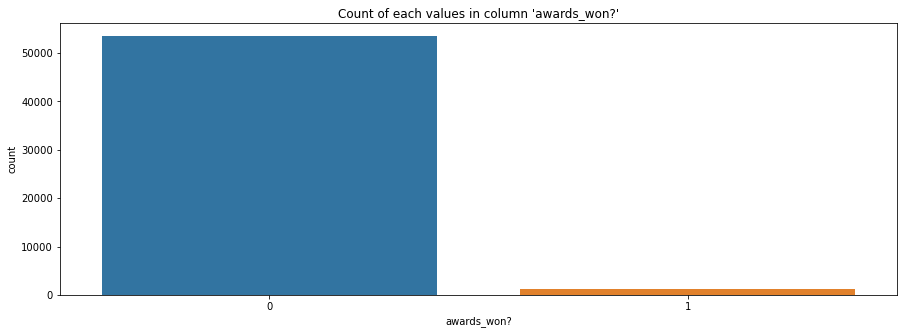

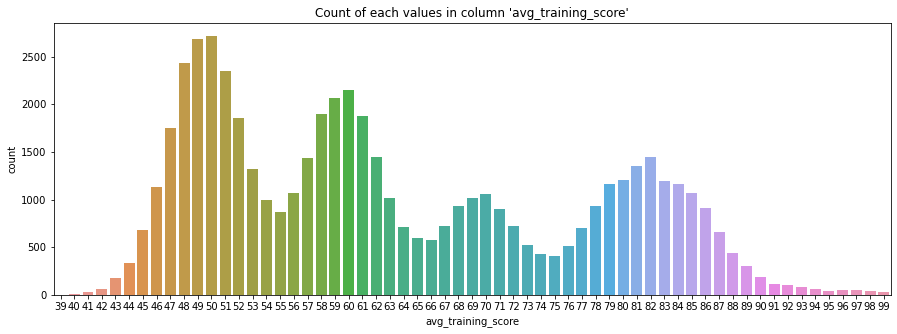

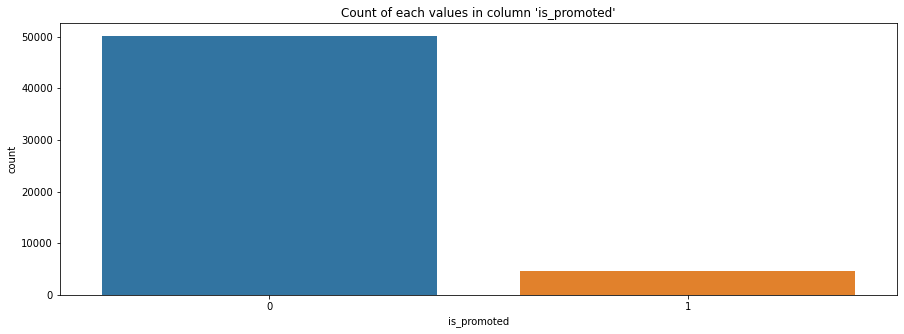

In [13]:
# Count of each values in column
for i in col_name:
    plt.figure(figsize=(15,5))
    plt.title("Count of each values in column '{}'".format(i))
    sns.countplot(df[i])
    plt.show()

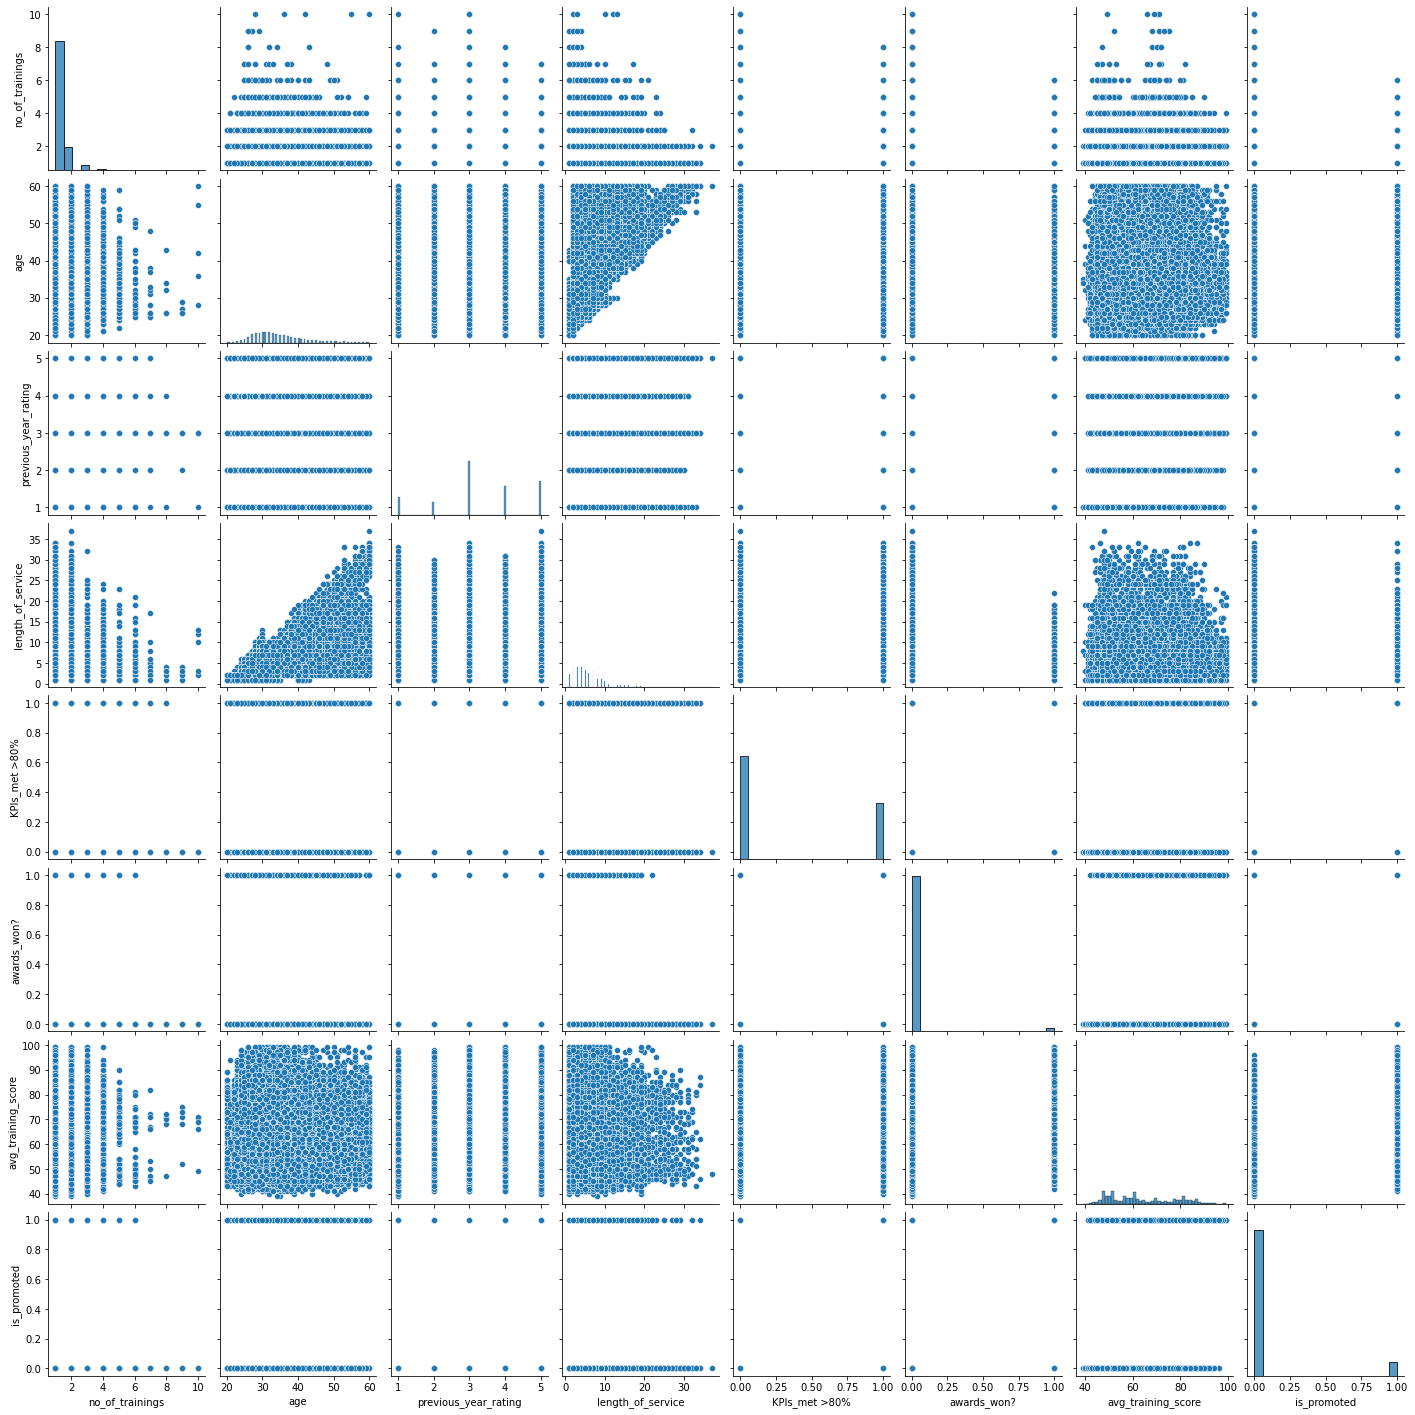

In [14]:
# Pair plot

sns.pairplot(df)
plt.show()

##### Finding missing values and imputing it:

In [15]:
print("There are totally {} missing values in the dataset.".format(df.isnull().sum().sum()))

There are totally 6533 missing values in the dataset.


In [16]:
# Count of missing values in column

for i in col_name:
    if df[i].isnull().sum() > 0:
        print("There are {} missing values in the '{}' column.\n".format(df[i].isnull().sum(),i))

There are 2409 missing values in the 'education' column.

There are 4124 missing values in the 'previous_year_rating' column.



In [17]:
# Imputing missing values in column education with forwardfill

df['education'] = df['education'].ffill()

In [18]:
# Value count for column "length_of_service" when "previous_year_rating" isnull

df[df["previous_year_rating"].isnull() == True]['length_of_service'].value_counts()

1    4124
Name: length_of_service, dtype: int64

In [19]:
# Imputing missing values in column "previous_year_rating" with "0" as length of service is 1 for missing values 

df['previous_year_rating'] = df['previous_year_rating'].fillna(0.0)

### Featuring Engineering:

In [20]:
# Binning the age column

df['age'] = pd.cut(x=df['age'], bins=[20, 29, 39, 49], 
                    labels=['20 to 30', '30 to 40', '40+']) 

In [21]:
# Changing datatype 'category' to 'object'

df['age'] = df['age'].astype('object')

### Spliting train data into Predictors(Independent) & Target(Dependent):

In [22]:
X = df.drop('is_promoted',axis=1)
y = df['is_promoted']

### Data encoding using OneHot encoding technique:

In [23]:
X_encode = pd.get_dummies(X,drop_first=True)

### Data scaling using RobustScalar:

In [24]:
from sklearn import preprocessing 

scaler = preprocessing.RobustScaler() 
X_standard = scaler.fit_transform(X_encode) 
X_standard = pd.DataFrame(X_standard, columns =X_encode.columns) 

### Creating Baseline ML Model for Binary Classification Problem:

In [25]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


Classifiers = {'0._XGBoost' : XGBClassifier(learning_rate =0.1, n_estimators=500, max_depth=5,subsample = 0.70,
                                            verbosity = 0, scale_pos_weight = 2.5,updater ="grow_histmaker",
                                            base_score  = 0.2),
               
               '1.CatBoost' : CatBoostClassifier(learning_rate=0.15, n_estimators=500, subsample=0.085, max_depth=5,
                                                 scale_pos_weight=2.5),
               
               '2.LightGBM' : LGBMClassifier(subsample_freq = 2, objective ="binary",importance_type = "gain",verbosity = -1,
                                             max_bin = 60,num_leaves = 300, boosting_type = 'dart',learning_rate=0.15, 
                                             n_estimators=500, max_depth=5, scale_pos_weight=2.5)}

- Parameters values are taken from tuning and trail and error method.

### Improving Model with Voting Classifier with MODEL Evaluation METRIC - "F1" and Predict Target "is_promoted":

In [26]:
from sklearn.ensemble import VotingClassifier

vc_model = VotingClassifier(estimators=[('XGBoost_Best', list(Classifiers.values())[0]), 
                                        ('CatBoost_Best', list(Classifiers.values())[1]),
                                        ('LightGBM_Best', list(Classifiers.values())[2]),
                                       ], 
                            voting='soft',weights=[2, 1, 3])

vc_model.fit(X_standard,y)

0:	learn: 0.5647893	total: 169ms	remaining: 1m 24s
1:	learn: 0.4834554	total: 186ms	remaining: 46.2s
2:	learn: 0.4509078	total: 196ms	remaining: 32.5s
3:	learn: 0.4144819	total: 203ms	remaining: 25.2s
4:	learn: 0.3983357	total: 209ms	remaining: 20.7s
5:	learn: 0.3844974	total: 216ms	remaining: 17.8s
6:	learn: 0.3660705	total: 223ms	remaining: 15.7s
7:	learn: 0.3535479	total: 230ms	remaining: 14.1s
8:	learn: 0.3437999	total: 237ms	remaining: 12.9s
9:	learn: 0.3358628	total: 243ms	remaining: 11.9s
10:	learn: 0.3240180	total: 250ms	remaining: 11.1s
11:	learn: 0.3228668	total: 259ms	remaining: 10.5s
12:	learn: 0.3187803	total: 266ms	remaining: 9.97s
13:	learn: 0.3169060	total: 273ms	remaining: 9.47s
14:	learn: 0.3134377	total: 279ms	remaining: 9.02s
15:	learn: 0.3118336	total: 288ms	remaining: 8.72s
16:	learn: 0.3110087	total: 295ms	remaining: 8.38s
17:	learn: 0.3036192	total: 301ms	remaining: 8.07s
18:	learn: 0.2987856	total: 309ms	remaining: 7.81s
19:	learn: 0.2979292	total: 315ms	remain

177:	learn: 0.2470367	total: 1.47s	remaining: 2.66s
178:	learn: 0.2468717	total: 1.48s	remaining: 2.66s
179:	learn: 0.2467952	total: 1.49s	remaining: 2.65s
180:	learn: 0.2467708	total: 1.5s	remaining: 2.64s
181:	learn: 0.2467093	total: 1.5s	remaining: 2.63s
182:	learn: 0.2466280	total: 1.51s	remaining: 2.62s
183:	learn: 0.2465581	total: 1.52s	remaining: 2.6s
184:	learn: 0.2464969	total: 1.52s	remaining: 2.6s
185:	learn: 0.2464683	total: 1.53s	remaining: 2.58s
186:	learn: 0.2464382	total: 1.54s	remaining: 2.57s
187:	learn: 0.2460213	total: 1.54s	remaining: 2.56s
188:	learn: 0.2459839	total: 1.55s	remaining: 2.55s
189:	learn: 0.2459240	total: 1.56s	remaining: 2.54s
190:	learn: 0.2458999	total: 1.56s	remaining: 2.53s
191:	learn: 0.2458665	total: 1.57s	remaining: 2.52s
192:	learn: 0.2457832	total: 1.58s	remaining: 2.51s
193:	learn: 0.2457151	total: 1.58s	remaining: 2.5s
194:	learn: 0.2456155	total: 1.59s	remaining: 2.49s
195:	learn: 0.2455638	total: 1.6s	remaining: 2.48s
196:	learn: 0.2455

357:	learn: 0.2327977	total: 2.77s	remaining: 1.1s
358:	learn: 0.2327742	total: 2.78s	remaining: 1.09s
359:	learn: 0.2327518	total: 2.78s	remaining: 1.08s
360:	learn: 0.2327036	total: 2.79s	remaining: 1.07s
361:	learn: 0.2326698	total: 2.8s	remaining: 1.07s
362:	learn: 0.2326040	total: 2.8s	remaining: 1.06s
363:	learn: 0.2325386	total: 2.81s	remaining: 1.05s
364:	learn: 0.2324931	total: 2.82s	remaining: 1.04s
365:	learn: 0.2324767	total: 2.83s	remaining: 1.03s
366:	learn: 0.2324478	total: 2.83s	remaining: 1.03s
367:	learn: 0.2323808	total: 2.84s	remaining: 1.02s
368:	learn: 0.2323310	total: 2.85s	remaining: 1.01s
369:	learn: 0.2323058	total: 2.86s	remaining: 1s
370:	learn: 0.2322577	total: 2.87s	remaining: 996ms
371:	learn: 0.2321776	total: 2.87s	remaining: 988ms
372:	learn: 0.2321101	total: 2.88s	remaining: 980ms
373:	learn: 0.2320935	total: 2.88s	remaining: 972ms
374:	learn: 0.2320684	total: 2.89s	remaining: 964ms
375:	learn: 0.2319950	total: 2.9s	remaining: 956ms
376:	learn: 0.23192

VotingClassifier(estimators=[('XGBoost_Best',
                              XGBClassifier(base_score=0.2, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_...
                                            reg_alpha=None, reg_lambda=None, ...)),
                             ('C

- Weights are taken from tuning.

## Scoring:

In [27]:
# Loading test dataset

df1 = pd.read_csv('test_2umaH9m.csv')
df1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [28]:
# Performing all the step on the unseen data that was performed on historical data

df2 = df1.copy()

df1.drop('employee_id',axis=1,inplace=True)

df1['education'] = df1['education'].ffill()

df1['previous_year_rating'] = df1['previous_year_rating'].fillna(0.0)

df1['age'] = pd.cut(x=df1['age'], bins=[20, 29, 39, 49], labels=['20 to 30', '30 to 40', '40+']) 
df1['age'] = df1['age'].astype('object')

df1_encode = pd.get_dummies(df1,drop_first=True)

scaler = preprocessing.RobustScaler() 
df_standard = scaler.fit_transform(df1_encode) 
df_standard = pd.DataFrame(df_standard, columns =df1_encode.columns)

### Predicting and storing the submission file:

In [30]:
df2['is_promoted'] = vc_model.predict(df_standard)

df1=df2[['employee_id','is_promoted']]
df1.to_csv('Predict.csv')